In [1]:
import os
import pandas as pd
import numpy as np
import sys


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
s_calender = pd.read_csv('seattle/s_calendar.csv')
s_listings  = pd.read_csv('seattle/s_listings.csv')
s_reviews  = pd.read_csv('seattle/s_reviews.csv')

# 1. Data Preparation and Understanding

In [3]:
s_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
s_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
s_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

## A. Dropping unnecessary "usr" columns 

In [6]:
url_cols = []
for col in s_listings.columns:
    if 'url' in col:
        url_cols.append(col)

In [7]:
s_listings.drop(url_cols, inplace=True, axis =1)

In [8]:
s_listings['cleaning_fee']

0           NaN
1        $40.00
2       $300.00
3           NaN
4       $125.00
         ...   
3813    $230.00
3814     $50.00
3815     $35.00
3816     $45.00
3817        NaN
Name: cleaning_fee, Length: 3818, dtype: object

## B. Converting price columns to floats

In [9]:
s_listings['host_response_rate'] = s_listings['host_response_rate'].str.replace('%','').astype(float)

In [10]:
def convert_obj_to_float(cols, df):
    '''
    this fucntion converts the price columns from object type to floats
    
    input : column list, dataframe
    
    output : new dataframe
    '''
    for col in cols: 
        df[col] = df[col].str.replace('$','').str.replace(',','').astype(float)
    print("type changed for columns ->", cols)
    return df


In [11]:
price_cols = []
for col in s_listings.columns:
    if 'price' in col:
        price_cols.append(col)
price_cols.extend(['security_deposit', 'cleaning_fee', 'extra_people'])

In [12]:
price_cols

['price',
 'weekly_price',
 'monthly_price',
 'security_deposit',
 'cleaning_fee',
 'extra_people']

In [13]:
s_listings = convert_obj_to_float(price_cols, s_listings)

type changed for columns -> ['price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']


## C. Dropping columns from the Dataset with greater than 75% null entries

In [14]:
null_col_dict = {}
for col in s_listings.columns:
    prcnt_null = s_listings[col].isnull().mean()*100
    null_col_dict[col] = prcnt_null

In [15]:
for k, v in null_col_dict.items():
    if v >75:
        s_listings.drop(k,inplace=True, axis = 1)

## D. Dropping all null rows in the price from the Dataset 

In [16]:
s_listings = s_listings[s_listings.notna()]

In [17]:
s_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   scrape_id                         3818 non-null   int64  
 2   last_scraped                      3818 non-null   object 
 3   name                              3818 non-null   object 
 4   summary                           3641 non-null   object 
 5   space                             3249 non-null   object 
 6   description                       3818 non-null   object 
 7   experiences_offered               3818 non-null   object 
 8   neighborhood_overview             2786 non-null   object 
 9   notes                             2212 non-null   object 
 10  transit                           2884 non-null   object 
 11  host_id                           3818 non-null   int64  
 12  host_n

In [18]:
s_listings['availability_30']

0       14
1       13
2        1
3        0
4       30
        ..
3813    18
3814     6
3815    29
3816    30
3817     7
Name: availability_30, Length: 3818, dtype: int64

## E.Understanding the co-relation of the columns in the listings DF

<AxesSubplot:>

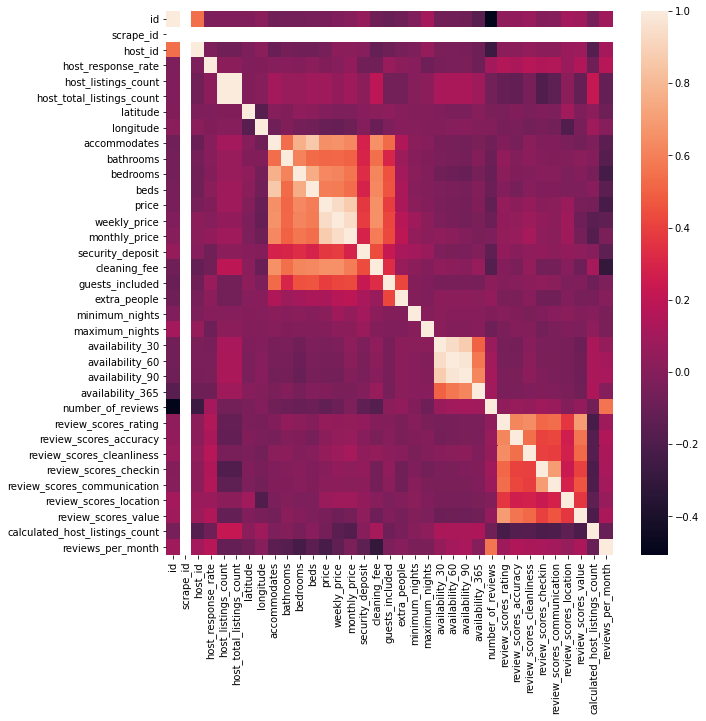

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(s_listings.corr())

# 2. Business Understanding

### Questions I want to answer

1. Which neighbourhoods have the highest number of listings?
2. Which neighbourhoods have the highest mean price per listing?
3. What makes superhosts different?


**1. Which neighbourhoods have the highest number of listings, avg price, number of listings and total revenue?**

In [20]:
s_listings.groupby(by='neighbourhood_group_cleansed')[['price','review_scores_rating']].mean().sort_values('price', ascending= False)

,price,review_scores_rating
neighbourhood_group_cleansed,,
Magnolia,177.672131,93.787234
Queen Anne,157.223729,95.443089
Downtown,154.405660,93.958333
West Seattle,141.359606,95.864198
Cascade,140.101124,92.461538
Capitol Hill,130.592593,94.184783
Central Area,128.338753,96.009404
Ballard,124.682609,95.533679
Other neighborhoods,119.968514,94.562500


In [21]:
s_listings_clean = s_listings.groupby(by='neighbourhood_group_cleansed')[['price','review_scores_rating', 'id']].agg({'price': ['mean','sum'], 
                                                                                                                      'review_scores_rating': ['mean'], 
                                                                                                                      'id':['count'], })
                                                                                                                   

s_listings_clean.columns = ['avg_listing_price', 'total_revenue', 'avg_review_rating', 'num_of_listing']
s_listings_clean = s_listings_clean.reset_index()

In [22]:
s_listings_clean

,neighbourhood_group_cleansed,avg_listing_price,total_revenue,avg_review_rating,num_of_listing
0,Ballard,124.682609,28677.0,95.533679,230
1,Beacon Hill,94.669492,11171.0,94.019417,118
2,Capitol Hill,130.592593,74046.0,94.184783,567
3,Cascade,140.101124,12469.0,92.461538,89
4,Central Area,128.338753,47357.0,96.009404,369
5,Delridge,83.278481,6579.0,95.861538,79
6,Downtown,154.405660,81835.0,93.958333,530
7,Interbay,109.727273,1207.0,93.777778,11
8,Lake City,92.671642,6209.0,94.375000,67
9,Magnolia,177.672131,10838.0,93.787234,61


In [23]:
def plot_bar(dataframe, x_column, y_column, x_label, y_label, title):
    '''
    this function plots a bar plot
    
    input:
            dataframe
            x_column : which variable you want on x-axis
            y_column : which varuable you want on y-axis
            x_label : 
            y_label :
            title
    '''
    s_listings_clean_sorted = dataframe.sort_values(by=y_column, ascending=False)
    plt.figure(figsize = (15,5))
    ax = sns.barplot(x=s_listings_clean_sorted[x_column], 
                      y=s_listings_clean_sorted[y_column])
    plt.xlabel(x_label, fontsize= 12)
    plt.ylabel(y_label, fontsize= 12)
    plt.title(title, fontsize=13)
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.savefig(title)

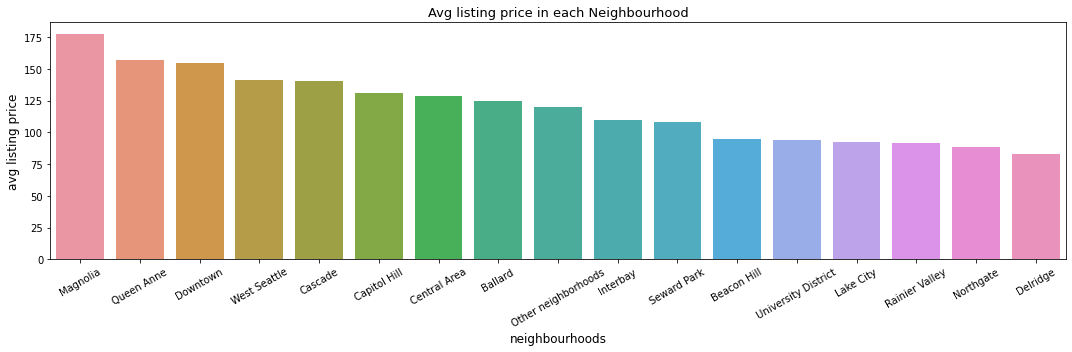

In [24]:
#plot for avg_listing_price in each neighborhood

plot_bar(s_listings_clean, 
         'neighbourhood_group_cleansed',
         'avg_listing_price',
         'neighbourhoods',
         'avg listing price', 
         'Avg listing price in each Neighbourhood' )

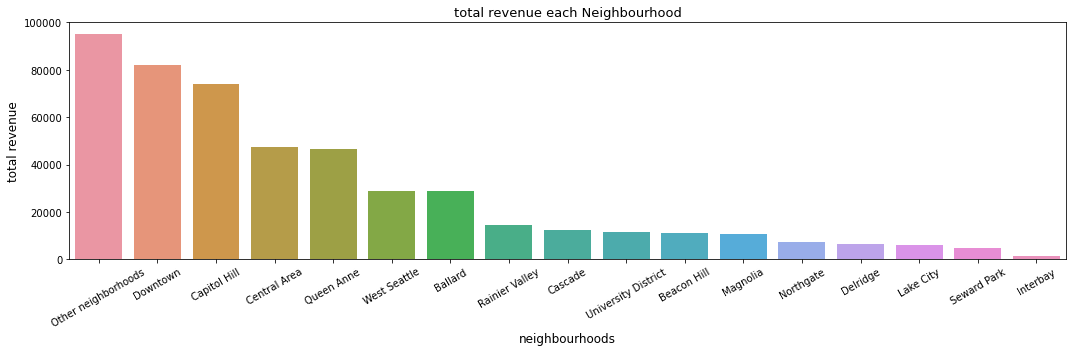

In [25]:
#plot for total revenue from each neighborhood

plot_bar(s_listings_clean, 
         'neighbourhood_group_cleansed',
         'total_revenue',
         'neighbourhoods',
         'total revenue', 
         'total revenue each Neighbourhood' )

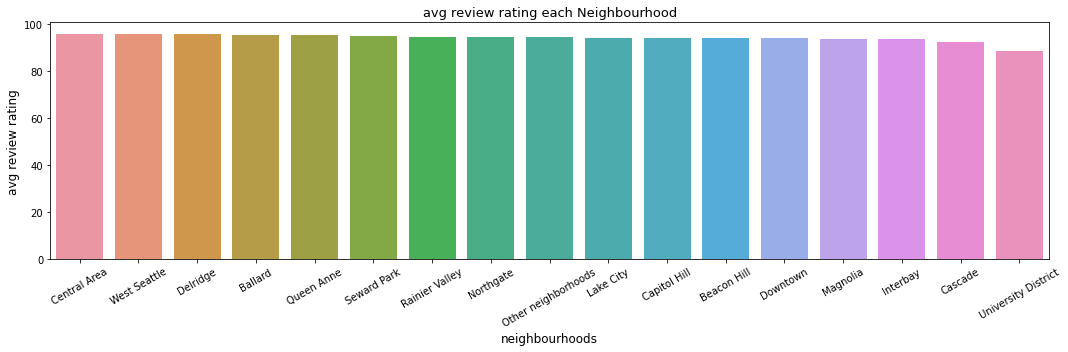

In [26]:
plot_bar(s_listings_clean, 
         'neighbourhood_group_cleansed',
         'avg_review_rating',
         'neighbourhoods',
         'avg review rating', 
         'avg review rating each Neighbourhood' )

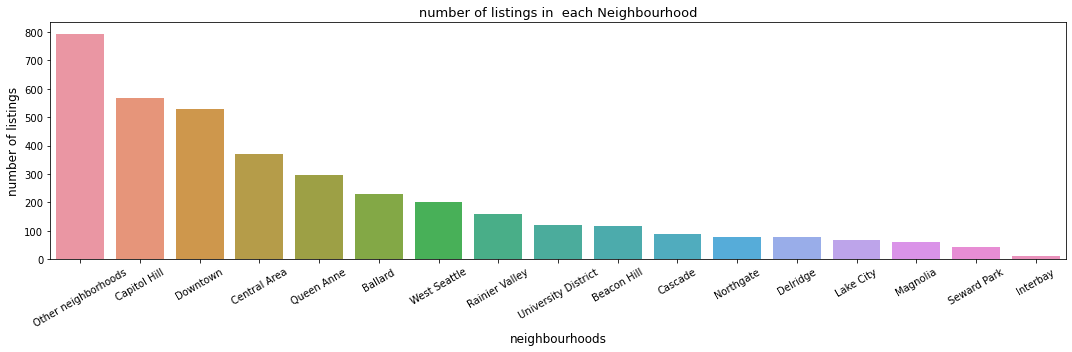

In [27]:
#plot for total listings from each neighborhood

plot_bar(s_listings_clean, 
         'neighbourhood_group_cleansed',
         'num_of_listing',
         'neighbourhoods',
         'number of listings', 
         'number of listings in  each Neighbourhood' )

<!-- <img src="seattle/kepler-gl.png"> -->

<AxesSubplot:>

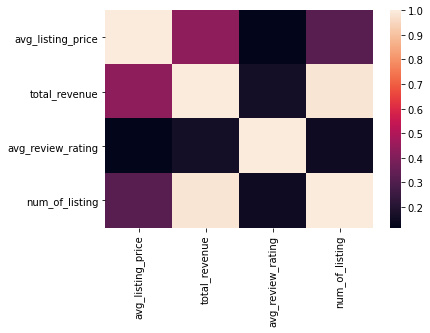

In [28]:
sns.heatmap(s_listings_clean.corr())

# How are super hosts different from normal hosts?

In [29]:
superhost_df = s_listings[s_listings['host_is_superhost'] == 't' ]
host_df = s_listings[s_listings['host_is_superhost'] == 'f' ]

In [30]:
superhost_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 778 entries, 1 to 3812
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                778 non-null    int64  
 1   scrape_id                         778 non-null    int64  
 2   last_scraped                      778 non-null    object 
 3   name                              778 non-null    object 
 4   summary                           752 non-null    object 
 5   space                             726 non-null    object 
 6   description                       778 non-null    object 
 7   experiences_offered               778 non-null    object 
 8   neighborhood_overview             635 non-null    object 
 9   notes                             539 non-null    object 
 10  transit                           650 non-null    object 
 11  host_id                           778 non-null    int64  
 12  host_na

<AxesSubplot:>

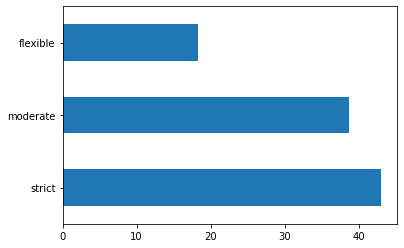

In [31]:
((superhost_df.cancellation_policy.value_counts()/sum(superhost_df.cancellation_policy.value_counts()))*100).plot(kind='barh')

<AxesSubplot:>

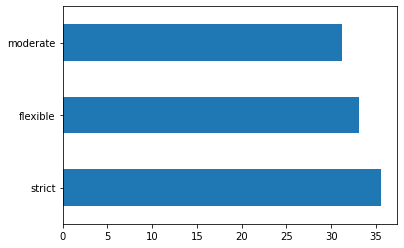

In [32]:
((host_df.cancellation_policy.value_counts()/sum(host_df.cancellation_policy.value_counts()))*100).plot(kind='barh')

<AxesSubplot:>

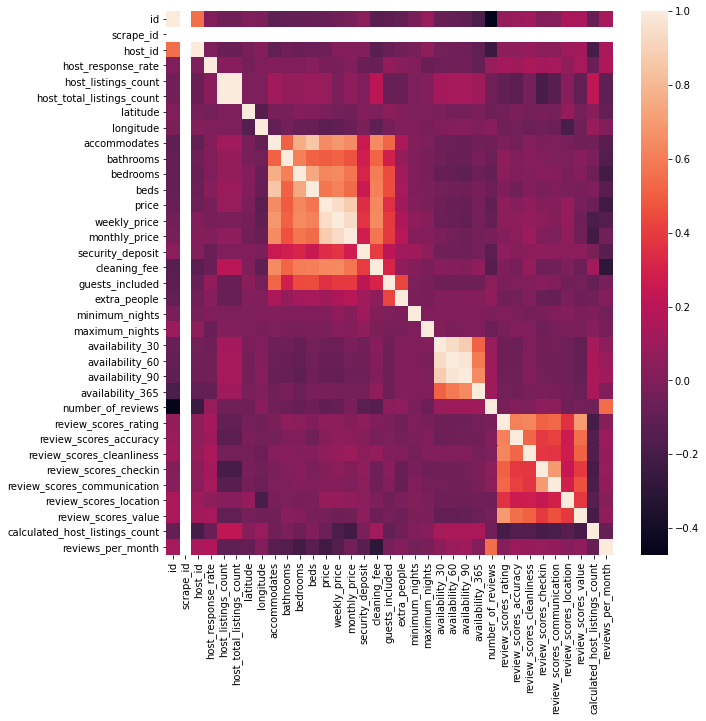

In [33]:
plt.figure(figsize = (10,10))

sns.heatmap(host_df.corr())

<AxesSubplot:>

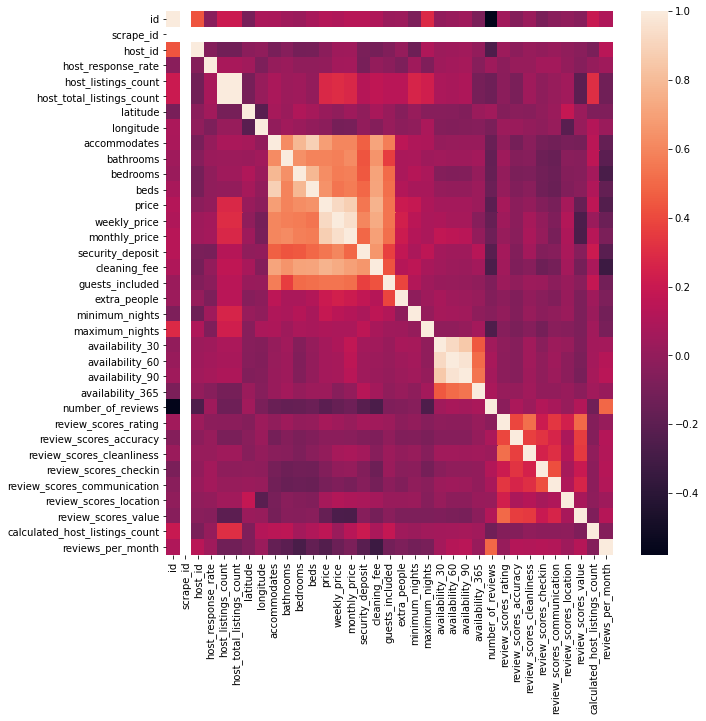

In [34]:
plt.figure(figsize = (10,10))

sns.heatmap(superhost_df.corr())

In [35]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3038 entries, 0 to 3817
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3038 non-null   int64  
 1   scrape_id                         3038 non-null   int64  
 2   last_scraped                      3038 non-null   object 
 3   name                              3038 non-null   object 
 4   summary                           2887 non-null   object 
 5   space                             2522 non-null   object 
 6   description                       3038 non-null   object 
 7   experiences_offered               3038 non-null   object 
 8   neighborhood_overview             2150 non-null   object 
 9   notes                             1672 non-null   object 
 10  transit                           2233 non-null   object 
 11  host_id                           3038 non-null   int64  
 12  host_n

In [63]:
relevant_cols = ['review_scores_value', 'review_scores_location', 'review_scores_communication', 'review_scores_checkin',
                'review_scores_cleanliness', 'review_scores_accuracy', 'review_scores_rating',]

price_cols =['extra_people',
                'guests_included', 'cleaning_fee', 'security_deposit', 'monthly_price', 'weekly_price', 'price', 'is_location_exact', ]

<AxesSubplot:>

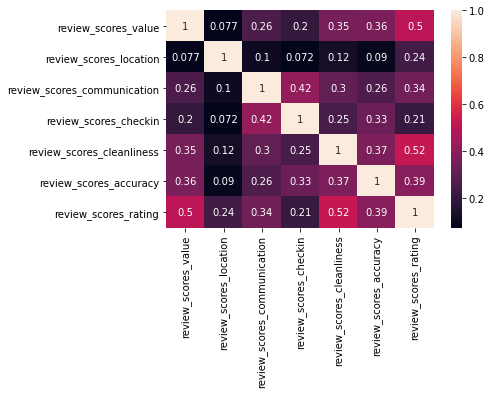

In [37]:
sns.heatmap(superhost_df[relevant_cols].corr(),annot=True,)

<AxesSubplot:>

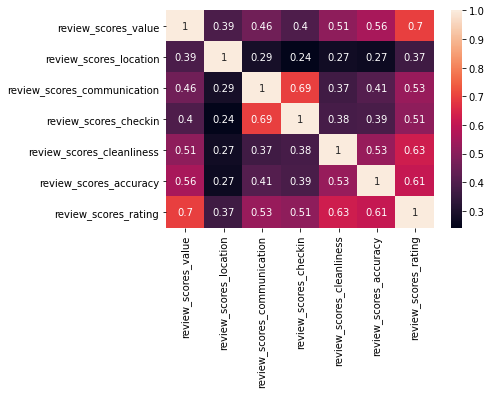

In [38]:
sns.heatmap(host_df[relevant_cols].corr(),annot=True)

<AxesSubplot:>

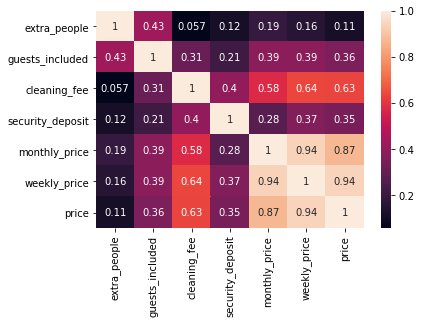

In [39]:
sns.heatmap(host_df[price_cols].corr(),annot=True)

<AxesSubplot:>

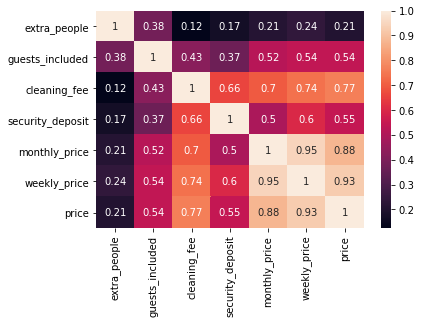

In [42]:
sns.heatmap(superhost_df[price_cols].corr(),annot=True)

<AxesSubplot:xlabel='neighbourhood_group_cleansed'>

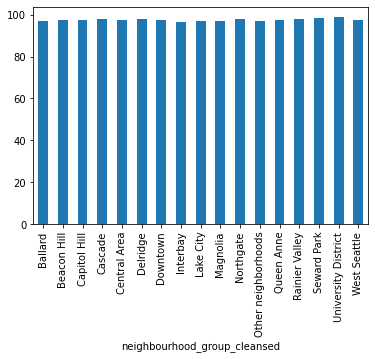

In [60]:
superhost_df.groupby(by=['neighbourhood_group_cleansed'])['review_scores_rating'].mean().plot(kind='bar')
# host_df.groupby(by=['neighbourhood_group_cleansed'])['review_scores_value'].mean().plot(kind='bar')

In [48]:
host_df.groupby(by=['neighbourhood_group_cleansed'])['review_scores_value'].mean()

neighbourhood_group_cleansed
Ballard                9.466165
Beacon Hill            9.282353
Capitol Hill           9.283069
Cascade                9.058824
Central Area           9.495536
Delridge               9.652174
Downtown               9.203911
Interbay               9.857143
Lake City              9.500000
Magnolia               9.352941
Northgate              9.511111
Other neighborhoods    9.395492
Queen Anne             9.508108
Rainier Valley         9.494845
Seward Park            9.448276
University District    8.750000
West Seattle           9.571429
Name: review_scores_value, dtype: float64

In [42]:
((host_df['is_location_exact'] == 't').sum()/len(host_df))*100

88.41342988808427

Text(0.5, 1.0, 'superhost heatmap')

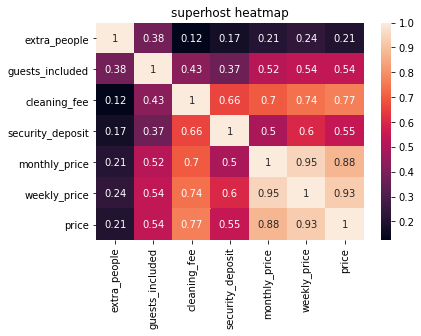

In [64]:
sns.heatmap(superhost_df[price_cols].corr(),annot=True)
plt.title("superhost heatmap")

Text(0.5, 1.0, 'regularhost heatmap')

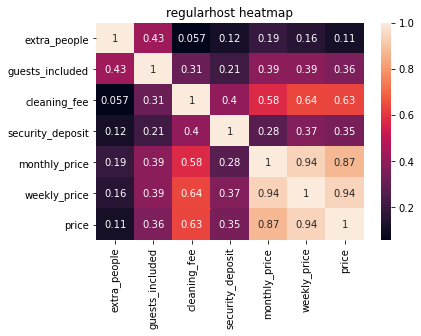

In [65]:
sns.heatmap(host_df[price_cols].corr(),annot=True)
plt.title("regularhost heatmap")

# overall listing trend

In [66]:
b_calender = pd.read_csv('boston/b_calendar.csv')
s_calender['price'] =s_calender['price'].str.replace('$','').str.replace(',','').astype(float)
s_calender['date'] = pd.to_datetime(s_calender['date'])


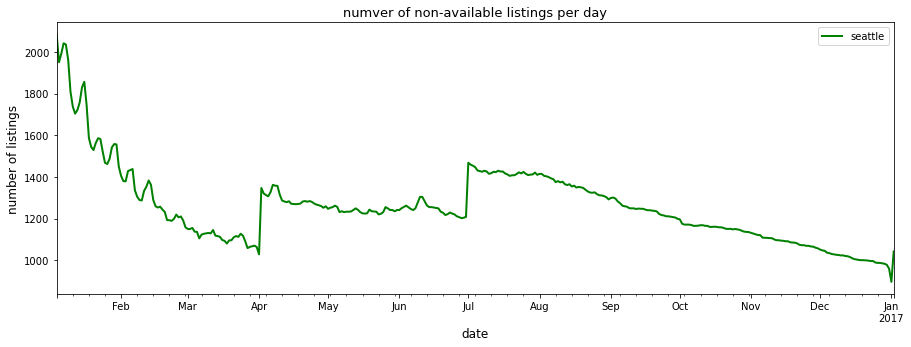

In [67]:
plt.figure(figsize = (15,5))

s_cal_notavailable = s_calender[s_calender['available'] == 'f']
# b_cal_notavailable = b_calender[b_calender['available'] == 'f']
s_cal_notavailable.groupby(['date'])['listing_id'].count().plot(marker='', color='green', linewidth=2, label='seattle')
# b_cal_notavailable.groupby(['date'])['listing_id'].count().plot(marker='', color='blue', linewidth=2, label = 'boston')
plt.xlabel('date', fontsize= 12)
plt.ylabel('number of listings', fontsize= 12)
plt.title('numver of non-available listings per day', fontsize=13)
plt.legend()

# keppler-gl map viz

In [69]:
df = pd.merge(s_calender, s_listings, left_on='listing_id', right_on= 'id')
df = df[df['price_x'].notna()]
df = df[['price_x', 'latitude', 'longitude', 'date', 'listing_id', 'neighbourhood']]
grouped_multiple = df.groupby(['latitude', 'longitude', 'neighbourhood']).agg({'price_x': ['mean', 'min', 'max', 'count']})
grouped_multiple.columns = ['price_mean', 'price_min', 'price_max', 'listing_count']
grouped_multiple = grouped_multiple.reset_index()

In [70]:
# Load an empty map
from keplergl import KeplerGl 
map_1 = KeplerGl(height=500)
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=500)

In [71]:
map_1.add_data(data = grouped_multiple, name='test_data')